In [1]:
%load_ext memory_profiler

In [ ]:
!rm a
!ls df >> a
letras  = open('a','r').read().split('\n')[:-1]

In [2]:
import trie

In [ ]:
raiz = trie.TrieNode('*')


In [ ]:
import pandas as pd

In [6]:
import mprof

In [ ]:
!python -m memory_profiler --pdb-mmem=100 profile.py

In [ ]:
# Example of reading from csv
node = trie.get_prefix(root, 'lucas')

if node.is_final:
    trie.printmd(trie.get_description(node))
else:
    print("Palavra não encontrada")

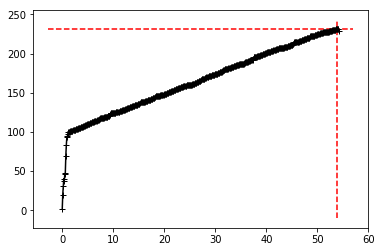

In [26]:
valor = plot_file("mprofile_20191114222346.dat")

In [22]:
from collections import defaultdict
import time, math

In [32]:
def plot_file(filename, index=0, timestamps=True, children=True, options=None):
    
    from scipy.optimize import curve_fit
 
    try:
        import pylab as pl
    except ImportError as e:
        print("matplotlib is needed for plotting.")
        print(e)
        sys.exit(1)
    import numpy as np  # pylab requires numpy anyway
    mprofile = read_mprofile_file(filename)

    if len(mprofile['timestamp']) == 0:
        print('** No memory usage values have been found in the profile '
              'file.**\nFile path: {0}\n'
              'File may be empty or invalid.\n'
              'It can be deleted with "mprof rm {0}"'.format(
            mprofile['filename']))
        sys.exit(0)

    # Merge function timestamps and memory usage together
    ts = mprofile['func_timestamp']
    t = mprofile['timestamp']
    mem = mprofile['mem_usage']
    chld = mprofile['children']

    if len(ts) > 0:
        for values in ts.values():
            for v in values:
                t.extend(v[:2])
                mem.extend(v[2:4])

    mem = np.asarray(mem)
    t = np.asarray(t)
    ind = t.argsort()
    mem = mem[ind]
    t = t[ind]

    # Plot curves
    global_start = float(t[0])
    t = t - global_start

    max_mem = mem.max()
    max_mem_ind = mem.argmax()

    all_colors = ("c", "y", "g", "r", "b")
    mem_line_colors = ("k", "b", "r", "g", "c", "y", "m")
    mem_line_label = time.strftime("%d / %m / %Y - start at %H:%M:%S",
                                   time.localtime(global_start)) \
                     + ".{0:03d}".format(int(round(math.modf(global_start)[0] * 1000)))

    pl.plot(t, mem, "+-" + mem_line_colors[index % len(mem_line_colors)],
            label=mem_line_label)

    bottom, top = pl.ylim()
    bottom += 0.001
    top -= 0.001
    
    
    # plot children, if any
    if len(chld) > 0 and children:
        cmpoint = (0,0) # maximal child memory

        for idx, (proc, data) in enumerate(chld.items()):
            # Create the numpy arrays from the series data
            cts  = np.asarray([item[1] for item in data]) - global_start
            cmem = np.asarray([item[0] for item in data])

            # Plot the line to the figure
            pl.plot(cts, cmem, "+-"  + mem_line_colors[(idx+1) % len(mem_line_colors)],
                     label="child {}".format(proc))

            # Detect the maximal child memory point
            cmax_mem = cmem.max()
            if cmax_mem > cmpoint[1]:
                cmpoint = (cts[cmem.argmax()], cmax_mem)

        # Add the marker lines for the maximal child memory usage
        pl.vlines(cmpoint[0], pl.ylim()[0]+0.001, pl.ylim()[1] - 0.001, 'r', '--')
        pl.hlines(cmpoint[1], pl.xlim()[0]+0.001, pl.xlim()[1] - 0.001, 'r', '--')

    # plot timestamps, if any
    if len(ts) > 0 and timestamps:
        func_num = 0
        for f, exec_ts in ts.items():
            for execution in exec_ts:
                add_brackets(execution[:2], execution[2:], xshift=global_start,
                             color=all_colors[func_num % len(all_colors)],
                             label=f.split(".")[-1]
                                   + " %.3fs" % (execution[1] - execution[0]), options=options)
            func_num += 1

    if timestamps:
        pl.hlines(max_mem,
                  pl.xlim()[0] + 0.001, pl.xlim()[1] - 0.001,
                  colors="r", linestyles="--")
        pl.vlines(t[max_mem_ind], bottom, top,
                  colors="r", linestyles="--")
        
    pl.show()
    return mprofile


In [16]:
def read_mprofile_file(filename):
    """Read an mprofile file and return its content.

    Returns
    =======
    content: dict
        Keys:

        - "mem_usage": (list) memory usage values, in MiB
        - "timestamp": (list) time instant for each memory usage value, in
            second
        - "func_timestamp": (dict) for each function, timestamps and memory
            usage upon entering and exiting.
        - 'cmd_line': (str) command-line ran for this profile.
    """
    func_ts = {}
    mem_usage = []
    timestamp = []
    children  = defaultdict(list)
    cmd_line = None
    f = open(filename, "r")
    for l in f:
        if l == '\n':
            raise ValueError('Sampling time was too short')
        field, value = l.split(' ', 1)
        if field == "MEM":
            # mem, timestamp
            values = value.split(' ')
            mem_usage.append(float(values[0]))
            timestamp.append(float(values[1]))

        elif field == "FUNC":
            values = value.split(' ')
            f_name, mem_start, start, mem_end, end = values[:5]
            ts = func_ts.get(f_name, [])
            ts.append([float(start), float(end),
                       float(mem_start), float(mem_end)])
            func_ts[f_name] = ts

        elif field == "CHLD":
            values = value.split(' ')
            chldnum = values[0]
            children[chldnum].append(
                (float(values[1]), float(values[2]))
            )

        elif field == "CMDLINE":
            cmd_line = value
        else:
            pass
    f.close()

    return {"mem_usage": mem_usage, "timestamp": timestamp,
            "func_timestamp": func_ts, 'filename': filename,
            'cmd_line': cmd_line, 'children': children}



for letra in letras:
    arq = ("df/"+letra)
    
    fin = open(arq, "rt")

    data = fin.read()
    #import pdb;pdb.set_trace()
    
    data = data.replace('\n\n', '¨')
    data = data.replace('\n', ' ')
    data = data.replace('¨', '\n')
    data = data.replace('*,','*¨')    
    data = data.replace("* *", "*")

    
    fin.close()
    
    fin = open(arq, "wt")
    fin.write(data)
    fin.close()
    

In [ ]:
#import pandas as pd
#import time
#for letra in letras:
#    print(letra)
#    pd.read_csv('df/'+letra, sep='¨',engine='python',header=None, error_bad_lines=False)
    #time.sleep(1)